# ALURA IMERSÃO DADOS

## Aula 02 - Tratamento de dados e primeiros gráficos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


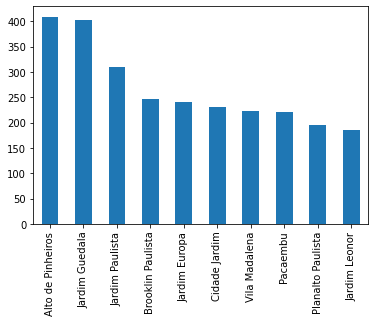

In [ ]:
n_imoveis_bairro = df["Bairro"].value_counts().head(10).plot.bar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
df["Valor"][0]

'R$ 7.000.000'

In [ ]:
type(df["Valor"][0])

str

In [ ]:
df["Valor"][0].split()

['R$', '7.000.000']

In [ ]:
df.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2446,NaN,Morumbi,São Paulo,350,4,5,4,R$ 14.000\n /Mês
1482,Rua Desembargador Vicente Penteado,Jardim América,São Paulo,310,4,3,2,R$ 5.000.000
3990,"Rua Nova Pátria, 299",Bosque da Saúde,São Paulo,275,4,4,4,R$ 1.550.000
1228,NaN,Jardim América,São Paulo,293,3,3,4,R$ 4.500.000
5350,Rua Marcelino Champagnat,Jardim da Glória,São Paulo,242,4,4,3,R$ 1.650.000
3067,Avenida Eliseu de Almeida,Instituto de Previdência,São Paulo,95,3,2,5,R$ 4.000\n /Mês
5390,NaN,Vila Ipojuca,São Paulo,75,2,1,1,R$ 545.000
2805,NaN,Perdizes,São Paulo,300,4,3,3,R$ 2.120.000
6632,NaN,Santo Amaro,São Paulo,275,3,3,3,R$ 1.650.000
9472,NaN,Chácara Inglesa,São Paulo,100,3,2,1,R$ 519.800


In [ ]:
df["Valor"].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [ ]:
df["Valor"].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
df["Valor"].str.split(expand=True)[0]

0        R$
1        R$
2        R$
3        R$
4        R$
         ..
10003    R$
10004    R$
10005    R$
10006    R$
10007    R$
Name: 0, Length: 10008, dtype: object

In [ ]:
df["Valor"].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [ ]:
df["Valor"].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [ ]:
len(df["Valor"].str.split(expand=True)[1].unique())

1038

In [ ]:
df["Valor"].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

Levar os dados pro dataframe

In [ ]:
df[["Moeda", "Valor_Anuncio", "Tipo"]] = df["Valor"].str.split(expand=True)

In [ ]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


Remover o que parece ser alugueis

In [ ]:
tipo_vazios = df["Tipo"].isnull()

In [ ]:
len(tipo_vazios)

10008

In [ ]:
df[tipo_vazios]["Tipo"].unique()

array([None], dtype=object)

In [ ]:
df_vendas = df[df["Tipo"].isnull()]

In [ ]:
df_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [ ]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_Anuncio  9156 non-null   object
 10  Tipo           0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [ ]:
df_vendas["Valor_Anuncio"].mean()

TypeError: ignored

In [ ]:
df_vendas["Valor_Anuncio"].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_Anuncio, Length: 9156, dtype: float64

In [ ]:
df_vendas["Valor_Anuncio"] = df_vendas["Valor_Anuncio"].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   object 
 8   Moeda          9156 non-null   object 
 9   Valor_Anuncio  9156 non-null   float64
 10  Tipo           0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


In [ ]:
df_vendas["Valor_Anuncio"].mean()

3052202.9554390563

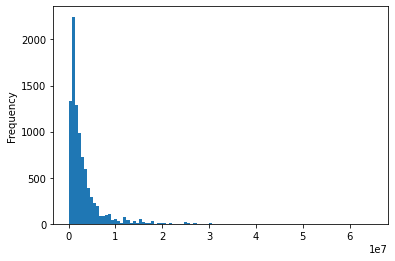

In [ ]:
df_vendas["Valor_Anuncio"].plot.hist(bins=100)

In [ ]:
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [ ]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [ ]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df_vendas.describe(include = "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156.00,0
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,NaN,0
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,3052202.96,NaN
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,3944208.19,NaN
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,13000.00,NaN
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,890000.00,NaN
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,1800000.00,NaN
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,3500000.00,NaN


In [ ]:
df_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


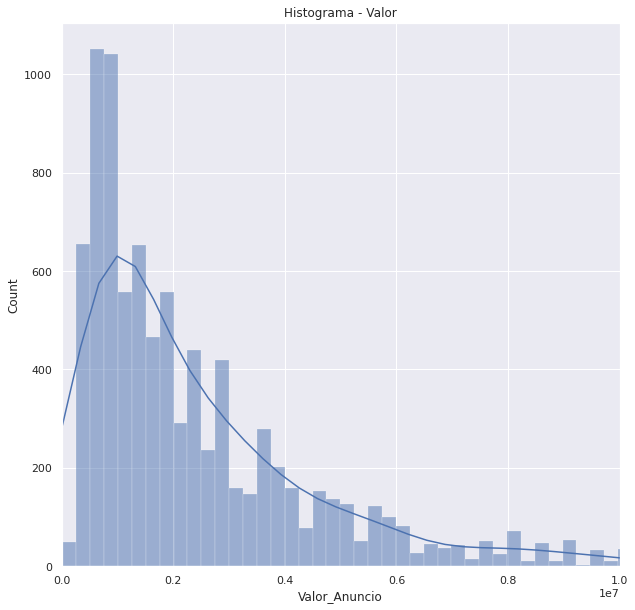

In [ ]:
sns.set()
plt.figure(figsize=(10,10))

ax=sns.histplot(x="Valor_Anuncio", data=df_vendas, kde=True)
ax.set_title("Histograma - Valor")
plt.xlim(0, 10000000)

plt.show()

### Desafios desta aula
* Criar uma escala de valores em milhões.


In [75]:
import matplotlib.ticker as ticker
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.f mi" % (x/1E6)

* Deixar o gráfico do histograma de valores legível (alterar labels, cores,título, escala).


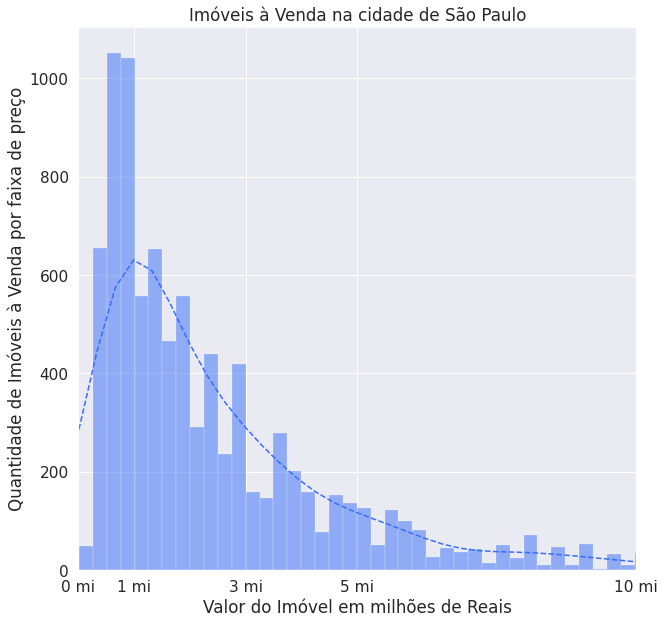

In [122]:
plt.figure(figsize=(10,10))

sns.set_theme(context='notebook', style='darkgrid', palette="rainbow", font='sans-serif', font_scale=1.4)
ax=sns.histplot(x="Valor_Anuncio", data=df_vendas, kde=True, line_kws= {'linestyle': 'dashed'})

plt.xticks([0, 1000000,3000000, 5000000, 10000000])
ax.xaxis.set_major_formatter(million_formatter)

ax.set_xlabel("Valor do Imóvel em milhões de Reais")
ax.set_ylabel("Quantidade de Imóveis à Venda por faixa de preço")
ax.set_title("Imóveis à Venda na cidade de São Paulo")
plt.xlim(0, 10000000)

plt.show()

* Preço (médio) do metro quadrado por bairro e plotar em um gráfico ideal.


In [106]:
df_vendas["Preco_metro"]=df_vendas["Valor_Anuncio"]/df_vendas["Metragem"]
por_bairro = df_vendas.groupby("Bairro")
por_bairro.describe()["Preco_metro"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Aclimação,79.00,7656.17,3087.22,3333.33,6000.00,7272.73,8528.14,20000.00
Alto da Boa Vista,8.00,5849.57,1251.64,4352.33,4875.26,5831.93,6711.05,7460.32
Alto da Lapa,80.00,7606.73,2897.23,2123.89,5928.24,7402.60,8857.14,20543.48
Alto da Mooca,20.00,5691.74,2025.24,1987.58,4912.28,5801.28,6728.94,9090.91
Alto de Pinheiros,369.00,11269.98,3939.97,3495.44,8625.00,10703.12,13245.03,25714.29
...,...,...,...,...,...,...,...,...
Vila Água Funda,5.00,4467.13,1532.07,2700.00,3421.05,4111.11,5944.06,6159.42
Água Branca,12.00,7269.11,1671.02,5902.44,6249.57,6584.81,7961.09,11818.18
Água Fria,12.00,5841.10,1278.07,3805.73,4903.12,6076.92,6733.48,7588.24


* Explorar as bibliotecas de visualizações e colocar as suas conclusão.


<Figure size 720x720 with 0 Axes>

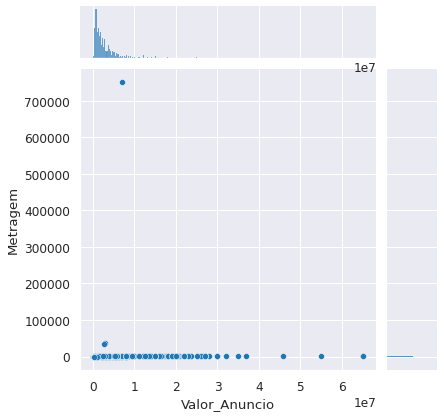

In [113]:
plt.figure(figsize=(10,10))

sns.set_theme(context='notebook', style='darkgrid', palette="tab10", font='sans-serif', font_scale=1.1)

ax2 = sns.jointplot(x='Valor_Anuncio',y='Metragem',data=df_vendas,kind='scatter')

In [111]:
df_vendas[["Metragem","Quartos","Banheiros","Vagas","Valor_Anuncio"]].corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio
Metragem,1.00,0.03,0.05,0.03,0.03
Quartos,0.03,1.00,0.52,0.39,0.33
Banheiros,0.05,0.52,1.00,0.45,0.43
Vagas,0.03,0.39,0.45,1.00,0.47
Valor_Anuncio,0.03,0.33,0.43,0.47,1.00


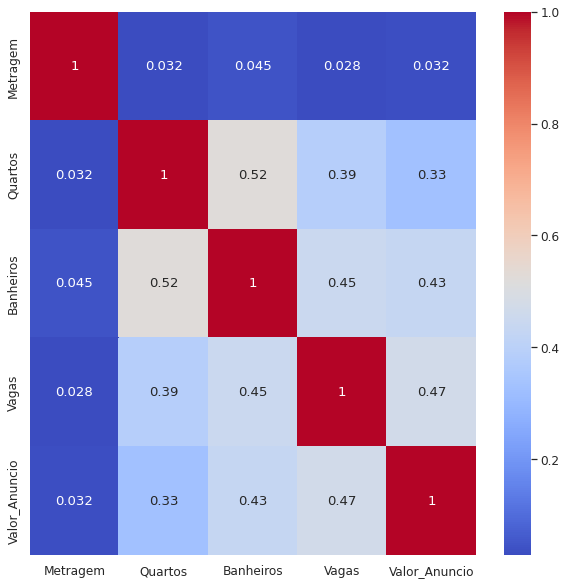

In [114]:
plt.figure(figsize=(10,10))
ax3 = sns.heatmap(df_vendas[["Metragem","Quartos","Banheiros","Vagas","Valor_Anuncio"]].corr(),cmap="coolwarm", annot=True)

* Pesquisar um visualização para analisar os quartis, mediana e outliers.

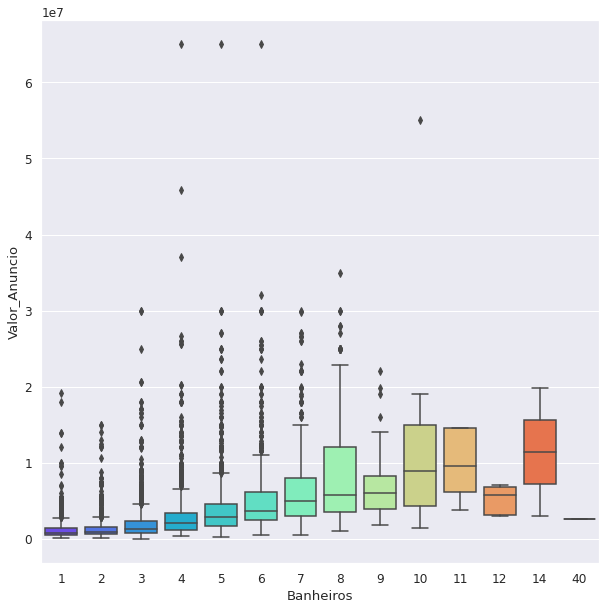

In [119]:
plt.figure(figsize=(10,10))
ax4 = sns.boxplot(x="Banheiros", y="Valor_Anuncio", data= df_vendas, palette="rainbow")

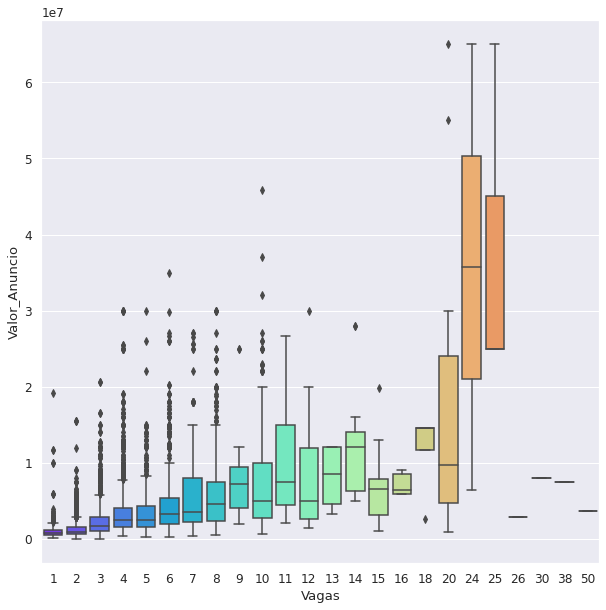

In [120]:
plt.figure(figsize=(10,10))
ax4 = sns.boxplot(x="Vagas", y="Valor_Anuncio", data= df_vendas, palette="rainbow")

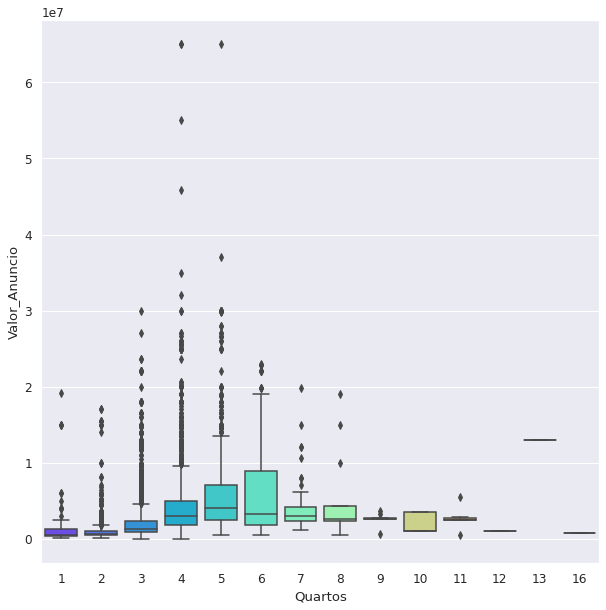

In [121]:
plt.figure(figsize=(10,10))
ax4 = sns.boxplot(x="Quartos", y="Valor_Anuncio", data= df_vendas, palette="rainbow")